In [2]:
# Imports nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [3]:
# Chargement des données
df = pd.read_csv('data.csv')
print(f"Aperçu des données ({df.shape[0]} lignes, {df.shape[1]} colonnes):")

df.head()

Aperçu des données (7431 lignes, 27 colonnes):


,source,neighborhood,city,state,transaction,property_type,date,listing_price,suffix,price_ttc,price,size,rooms,bedrooms,bathrooms,parkings,finishing,condition,construction_year,age,air_conditioning,central_heating,swimming_pool,elevator,garden,equipped_kitchen,amenities
0,century 21,Ain Zaghouan Nord,Ain Zaghouan,Tunis,sale,villa,2/12/2025,1700000.0,TTC,1700000.0,1700000.0,400,7.0,5.0,4.0,1.0,haut standing,bonne condition,2012.0,13.0,1.0,1.0,0.0,0.0,1.0,1.0,Parking+Terrasse+Chauffage Central+Prise lave-...
1,century 21,Ain Zaghouan Nord,Ain Zaghouan,Tunis,sale,villa,8/24/2024,1580000.0,TTC,1580000.0,1659000.0,600,7.0,5.0,3.0,3.0,moyen standing,excellente condition,NaN,NaN,1.0,1.0,1.0,0.0,1.0,1.0,Terrasse+Chambre de Service+Parking+Chauffage ...
2,tecnocasa,Ain Zaghouan,Ain Zaghouan,Tunis,sale,villa,4/11/2025,1500000.0,TTC,1500000.0,1500000.0,368,0.0,0.0,0.0,0.0,moyen standing,bonne condition,2008.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,century 21,Ain Zaghouan Nord,Ain Zaghouan,Tunis,sale,appartement,11/17/2023,1200000.0,TTC,1200000.0,1323000.0,256,6.0,4.0,3.0,1.0,haut standing,neuf,2023.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,Piscine+Prise lave-vaisselle+Chauffage Central...
4,century 21,Ain Zaghouan Nord,Ain Zaghouan,Tunis,sale,duplex,11/16/2023,1200000.0,TTC,1200000.0,1323000.0,256,6.0,4.0,3.0,1.0,haut standing,neuf,2023.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,Terrasse+Chambre de Service+Double vitrage+Cam...


In [4]:
numeric_columns = ['listing_price','price_ttc','price', 'size', 'rooms', 'bedrooms', 'bathrooms', 'parkings', 
                  'construction_year', 'age', 'air_conditioning', 'central_heating', 
                  'swimming_pool', 'elevator', 'garden', 'equipped_kitchen']
for col in numeric_columns:
    if col in df.columns:
        # Afficher le type original
        original_type = df[col].dtype
        
        # Convertir en numérique
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Afficher les informations sur la conversion
        na_count = df[col].isna().sum()
        print(f"Conversion de '{col}': {original_type} -> {df[col].dtype}, valeurs NA créées: {na_count}")

Conversion de 'listing_price': float64 -> float64, valeurs NA créées: 244
Conversion de 'price_ttc': float64 -> float64, valeurs NA créées: 244
Conversion de 'price': float64 -> float64, valeurs NA créées: 244
Conversion de 'size': int64 -> int64, valeurs NA créées: 0
Conversion de 'rooms': float64 -> float64, valeurs NA créées: 14
Conversion de 'bedrooms': float64 -> float64, valeurs NA créées: 14
Conversion de 'bathrooms': float64 -> float64, valeurs NA créées: 14
Conversion de 'parkings': float64 -> float64, valeurs NA créées: 11
Conversion de 'construction_year': float64 -> float64, valeurs NA créées: 4968
Conversion de 'age': float64 -> float64, valeurs NA créées: 4969
Conversion de 'air_conditioning': float64 -> float64, valeurs NA créées: 1863
Conversion de 'central_heating': float64 -> float64, valeurs NA créées: 1863
Conversion de 'swimming_pool': float64 -> float64, valeurs NA créées: 1863
Conversion de 'elevator': float64 -> float64, valeurs NA créées: 1863
Conversion de 'ga

In [5]:
print("\nInformations sur les types de données après conversion:")
display(df.info())


Informations sur les types de données après conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7431 entries, 0 to 7430
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   source             7431 non-null   object 
 1   neighborhood       7431 non-null   object 
 2   city               7431 non-null   object 
 3   state              7431 non-null   object 
 4   transaction        7431 non-null   object 
 5   property_type      7431 non-null   object 
 6   date               7431 non-null   object 
 7   listing_price      7187 non-null   float64
 8   suffix             7187 non-null   object 
 9   price_ttc          7187 non-null   float64
 10  price              7187 non-null   float64
 11  size               7431 non-null   int64  
 12  rooms              7417 non-null   float64
 13  bedrooms           7417 non-null   float64
 14  bathrooms          7417 non-null   float64
 15  parkings       

None

In [6]:
print("\nStatistiques descriptives:")
display(df.describe().T)


Statistiques descriptives:


,count,mean,std,min,25%,50%,75%,max
listing_price,7187.0,286068.368860,592021.884843,130.0,1900.0,4000.0,382867.0,8500000.0
price_ttc,7187.0,287366.200501,592702.738124,450.0,1900.0,4500.0,385000.0,8500000.0
price,7187.0,296363.016419,612018.575976,496.0,2000.0,4631.0,395000.0,8500000.0
size,7431.0,211.214103,303.284166,20.0,100.0,140.0,210.0,6455.0
rooms,7417.0,3.657813,2.157921,0.0,3.0,3.0,4.0,74.0
bedrooms,7417.0,2.396252,1.609724,0.0,1.0,2.0,3.0,22.0
bathrooms,7417.0,1.448969,1.051078,0.0,1.0,1.0,2.0,18.0
parkings,7420.0,1.028571,2.660204,0.0,0.0,1.0,1.0,180.0
construction_year,2463.0,2014.314657,12.515549,1900.0,2010.0,2019.0,2023.0,2025.0
age,2462.0,10.698213,12.557592,0.0,2.0,6.0,15.0,125.0



Récapitulatif détaillé des données manquantes:


,Type de données,Valeurs non-NA,Valeurs NA,Pourcentage NA (%),Valeurs uniques
age,float64,2462,4969,66.87,52
construction_year,float64,2463,4968,66.86,52
condition,object,5457,1974,26.56,5
finishing,object,5518,1913,25.74,5
amenities,object,5568,1863,25.07,4341
equipped_kitchen,float64,5568,1863,25.07,2
garden,float64,5568,1863,25.07,2
elevator,float64,5568,1863,25.07,2
swimming_pool,float64,5568,1863,25.07,2
central_heating,float64,5568,1863,25.07,2


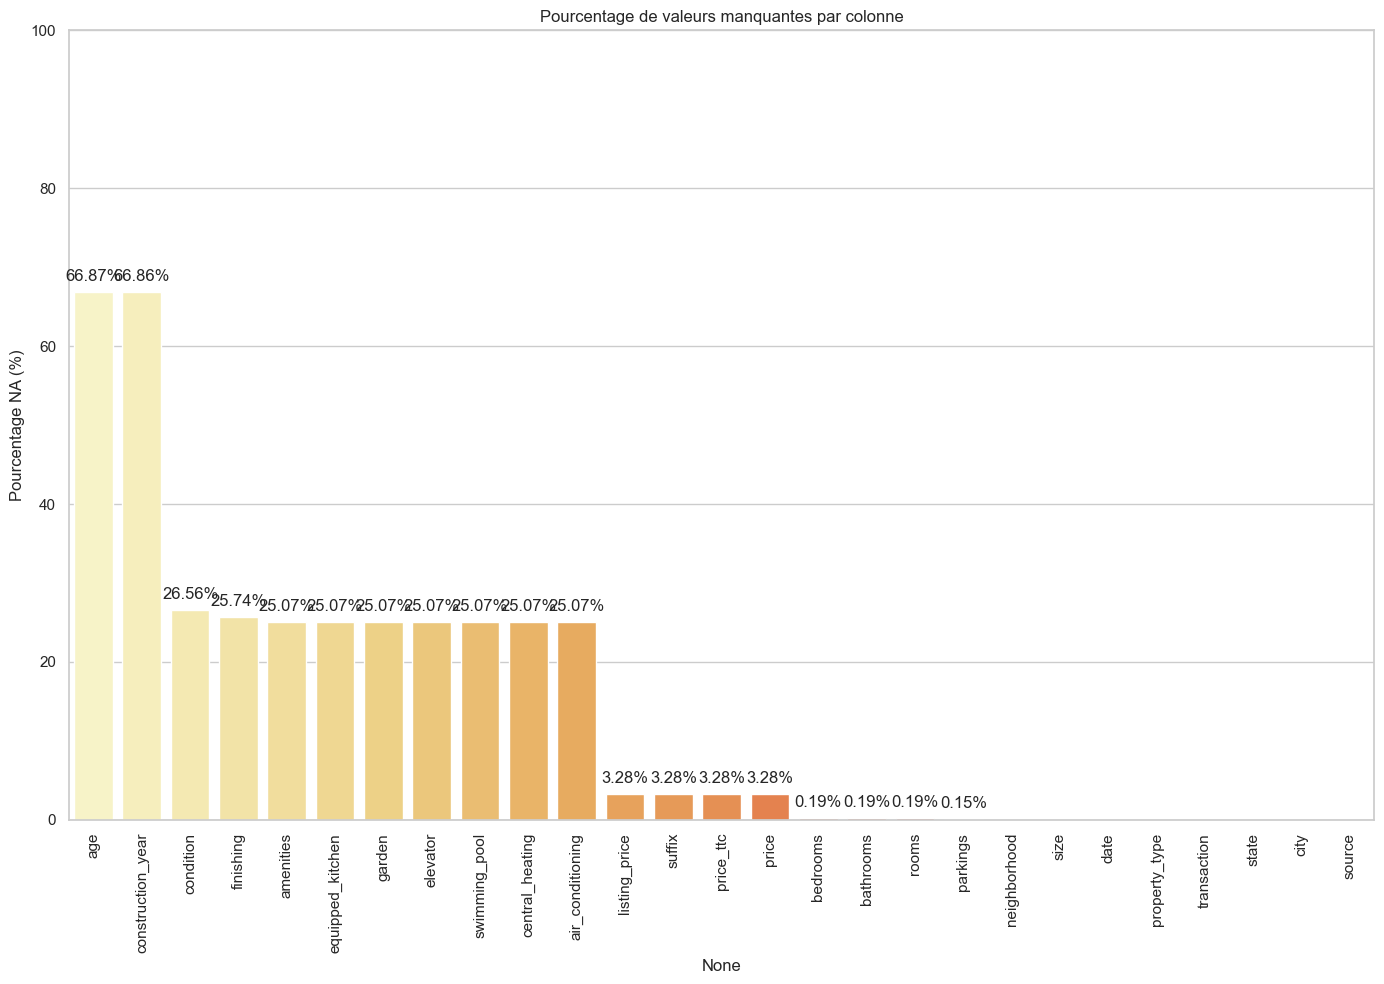


Colonnes avec plus de 30% de valeurs manquantes:


,Type de données,Valeurs non-NA,Valeurs NA,Pourcentage NA (%),Valeurs uniques
age,float64,2462,4969,66.87,52
construction_year,float64,2463,4968,66.86,52



Colonnes sans valeurs manquantes:


,Type de données,Valeurs non-NA,Valeurs NA,Pourcentage NA (%),Valeurs uniques
neighborhood,object,7431,0,0.0,192
size,int64,7431,0,0.0,532
date,object,7431,0,0.0,879
property_type,object,7431,0,0.0,7
transaction,object,7431,0,0.0,3
state,object,7431,0,0.0,6
city,object,7431,0,0.0,60
source,object,7431,0,0.0,4


In [7]:
# Analyse détaillée des valeurs manquantes
def analyze_missing_data(df):
    # Calculer les informations sur les valeurs manquantes
    missing_count = df.isna().sum()
    missing_percent = (df.isna().sum() / len(df) * 100).round(2)
    
    # Créer un DataFrame avec ces informations
    missing_data = pd.DataFrame({
        'Type de données': df.dtypes,
        'Valeurs non-NA': df.count(),
        'Valeurs NA': missing_count,
        'Pourcentage NA (%)': missing_percent,
        'Valeurs uniques': df.nunique()
    })
    
    # Trier par pourcentage de valeurs manquantes (décroissant)
    missing_data = missing_data.sort_values('Pourcentage NA (%)', ascending=False)
    
    return missing_data

# Générer le récapitulatif des données manquantes
missing_summary = analyze_missing_data(df)

# Afficher le récapitulatif complet
print("\nRécapitulatif détaillé des données manquantes:")
display(missing_summary)

# Visualiser les données manquantes sous forme de graphique
plt.figure(figsize=(14, 10))
ax = sns.barplot(x=missing_summary.index, 
                 y='Pourcentage NA (%)', 
                 data=missing_summary,
                 palette='YlOrRd')
plt.title('Pourcentage de valeurs manquantes par colonne')
plt.xticks(rotation=90)
plt.ylim(0, 100)
plt.tight_layout()

# Ajouter les pourcentages sur les barres
for i, value in enumerate(missing_summary['Pourcentage NA (%)']):
    if value > 0:  # Afficher uniquement les valeurs non nulles
        ax.text(i, value + 1, f'{value}%', ha='center', va='bottom')

plt.show()

# Identifier les colonnes avec beaucoup de valeurs manquantes
high_missing_cols = missing_summary[missing_summary['Pourcentage NA (%)'] > 30]
if not high_missing_cols.empty:
    print("\nColonnes avec plus de 30% de valeurs manquantes:")
    display(high_missing_cols)

# Identifier les colonnes sans valeurs manquantes
no_missing_cols = missing_summary[missing_summary['Pourcentage NA (%)'] == 0]
if not no_missing_cols.empty:
    print("\nColonnes sans valeurs manquantes:")
    display(no_missing_cols)

In [8]:
# Valeurs uniques pour les colonnes catégorielles
unique_transactions = df['transaction'].unique()
unique_sources = df['source'].unique()
unique_property_types = df['property_type'].unique()
unique_finishings = df['finishing'].unique()
unique_conditions = df['condition'].unique()
unique_neighborhoods= df['neighborhood'].unique()
print("\nValeurs uniques pour la colonne 'transaction':")
print(unique_transactions)
print("\nValeurs uniques pour la colonne 'finishing':")
print(unique_finishings)
print("Valeurs uniques pour la colonne 'condition':")
print(unique_conditions)
print("\nValeurs uniques pour la colonne 'property_type':")
print(unique_property_types)
print("Valeurs uniques pour la colonne 'source':")
print(unique_sources)

print("\nValeurs uniques pour la colonne 'neighborhood':")
print(unique_neighborhoods)


Valeurs uniques pour la colonne 'transaction':
['sale' 'rent_furnished' 'rent']

Valeurs uniques pour la colonne 'finishing':
['haut standing' 'moyen standing' 'très haut standing' nan 'économique'
 'social']
Valeurs uniques pour la colonne 'condition':
['bonne condition' 'excellente condition' 'neuf' nan 'à rafraichir'
 'à rénover']

Valeurs uniques pour la colonne 'property_type':
['villa' 'appartement' 'duplex' 'local commercial' 'bureau'
 'étage de villa' 'depot']
Valeurs uniques pour la colonne 'source':
['century 21' 'tecnocasa' 'newkey' 'remax']

Valeurs uniques pour la colonne 'neighborhood':
['Ain Zaghouan Nord' 'Ain Zaghouan' 'Chatt Meriem' 'Akouda' 'Aouina'
 "Jardins d'El Aouina" 'Cité Les Palmeraies' 'Riadh Landlous' 'Ariana'
 'Nouvelle Ariana' 'Borj Louzir' 'Cité El Ghazela' 'Borj El Baccouche'
 'Bab Bhar' 'Montplaisir' "Taieb El M'hiri" 'Hedi Chaker' 'Lafayette'
 'Republique' 'Bab El Khadra' 'Ben Arous' 'Jinen béni khiar'
 'Béni khiar plage' 'Bou Ficha' 'Bou Mhel' 'Cité 

In [9]:
# Imputation des valeurs manquantes
# Données numériques : 

#imputation des prix manquants par la moyenne  pour chaque quartier, type de propriété et transaction 
# exemple : Centre Urbain Nord, Appartement, Vente
df['price'] = df.groupby(['neighborhood', 'property_type','transaction'])['price'].transform(
    lambda x: x.fillna(x.mean())
)
df['price_ttc'] = df.groupby(['neighborhood', 'property_type','transaction'])['price_ttc'].transform(
    lambda x: x.fillna(x.mean())
)
# Remplir les valeurs manquantes de 'listing_price' avec la valeur de 'price' si disponible
df['listing_price'] = df['listing_price'].fillna(df['price'])
# remplacer suffixe par ttc par defaut
df['suffix'] = df['suffix'].fillna('TTC')


# Afficher les lignes où 'price' est toujours manquant après l'imputation
null_price_rows = df[df['price'].isna()]
display(null_price_rows)
print(f"Nombre de lignes avec 'price' manquant après imputation : {null_price_rows.shape[0]}") # de 244 prix manquants on passe à 27

,source,neighborhood,city,state,transaction,property_type,date,listing_price,suffix,price_ttc,price,size,rooms,bedrooms,bathrooms,parkings,finishing,condition,construction_year,age,air_conditioning,central_heating,swimming_pool,elevator,garden,equipped_kitchen,amenities
475,remax,Ain Zaghouan,Ain Zaghouan,Tunis,sale,étage de villa,2/24/2025,NaN,TTC,NaN,NaN,224,4.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1071,remax,Nouvelle Ariana,Ariana Ville,Ariana,rent,villa,2/24/2025,NaN,TTC,NaN,NaN,400,6.0,0.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1564,newkey,Le Kram,El Kram,Tunis,sale,bureau,2/23/2025,NaN,TTC,NaN,NaN,234,6.0,6.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,remax,Mutuelle Ville,El Menzah,Tunis,sale,étage de villa,2/24/2025,NaN,TTC,NaN,NaN,630,5.0,4.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,century 21,El Menzah 7,El Menzah,Ariana,rent_furnished,appartement,10/25/2024,NaN,TTC,NaN,NaN,85,2.0,1.0,1.0,1.0,moyen standing,à rafraichir,2000.0,25.0,1.0,1.0,0.0,1.0,0.0,1.0,Climatisation+Ascenseur+Parking+Chauffage Cent...
1993,remax,El Menzah 4,El Menzah,Tunis,sale,local commercial,2/24/2025,NaN,TTC,NaN,NaN,219,2.0,0.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,remax,El Menzah 4,El Menzah,Tunis,rent,bureau,2/26/2025,NaN,TTC,NaN,NaN,549,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2041,remax,El Omrane,El Omrane,Tunis,sale,bureau,2/24/2025,NaN,TTC,NaN,NaN,1200,9.0,8.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2042,remax,Cité Ibn Khaldoun I,El Omrane Superieur,Tunis,sale,duplex,2/23/2025,NaN,TTC,NaN,NaN,160,5.0,4.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2044,remax,El Ouerdia,El Ouerdia,Tunis,sale,appartement,2/24/2025,NaN,TTC,NaN,NaN,104,3.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nombre de lignes avec 'price' manquant après imputation : 27


In [10]:
# Variables catégorielles: imputation par la valeur la plus fréquente
# Condition 

def impute_condition_simple(df):
    """
    Impute les valeurs manquantes dans la colonne 'condition' en se basant sur:
    1. La zone (neighborhood ou city)
    2. Le type de transaction
    3. L'intervalle de prix
    
    Cette version suppose qu'il n'y a pas de valeurs manquantes dans 
    les colonnes de groupement (price, neighborhood/city, transaction).
    """
    # Créer une copie pour ne pas modifier le dataframe original
    df_imputed = df.copy()
    
    # Vérifier s'il y a des valeurs manquantes dans la colonne condition
    missing_count = df_imputed['condition'].isna().sum()
    if missing_count == 0:
        print("Aucune valeur manquante dans la colonne 'condition'. Aucune imputation nécessaire.")
        return df_imputed
    
    print(f"Imputation de {missing_count} valeurs manquantes dans la colonne 'condition'...")
    
    # 1. Déterminer quelle colonne de zone utiliser
    zone_column = 'neighborhood' if 'neighborhood' in df_imputed.columns else 'city'
    print(f"Utilisation de '{zone_column}' comme colonne de zone géographique")
    
    # 2. Créer des intervalles de prix pour le groupement
    # Calculer les quantiles pour créer des segments de prix équilibrés
    price_bins = [0] + list(df_imputed['price'].quantile([0.25, 0.5, 0.75, 1.0]))
    price_labels = ['Bas', 'Moyen-bas', 'Moyen-haut', 'Élevé']
    
    # Créer une colonne pour l'intervalle de prix
    df_imputed['price_range'] = pd.cut(df_imputed['price'], 
                                     bins=price_bins, 
                                     labels=price_labels,
                                     include_lowest=True)
    
    # 3. Approche par niveaux pour l'imputation
    # Masque initial pour les lignes avec condition manquante
    missing_mask = df_imputed['condition'].isna()
    
    # Niveau 1: Imputation basée sur zone + transaction + intervalle de prix
    for index, row in df_imputed[missing_mask].iterrows():
        # Trouver des propriétés similaires avec la même zone, transaction et intervalle de prix
        similar_props = df_imputed[
            (df_imputed[zone_column] == row[zone_column]) & 
            (df_imputed['transaction'] == row['transaction']) & 
            (df_imputed['price_range'] == row['price_range']) & 
            (~df_imputed['condition'].isna())
        ]
        
        # S'il y a des propriétés similaires, utiliser leur condition la plus fréquente
        if len(similar_props) > 0:
            df_imputed.loc[index, 'condition'] = similar_props['condition'].mode()[0]
    
    # Mise à jour du masque après le premier niveau d'imputation
    missing_mask = df_imputed['condition'].isna()
    remaining = missing_mask.sum()
    
    if remaining > 0:
        print(f"Niveau 1 terminé. {remaining} valeurs restent à imputer.")
        
        # Niveau 2: Imputation basée sur transaction + intervalle de prix
        for index, row in df_imputed[missing_mask].iterrows():
            similar_props = df_imputed[
                (df_imputed['transaction'] == row['transaction']) & 
                (df_imputed['price_range'] == row['price_range']) & 
                (~df_imputed['condition'].isna())
            ]
            
            if len(similar_props) > 0:
                df_imputed.loc[index, 'condition'] = similar_props['condition'].mode()[0]
        
        # Mise à jour du masque après le deuxième niveau
        missing_mask = df_imputed['condition'].isna()
        remaining = missing_mask.sum()
        
        if remaining > 0:
            print(f"Niveau 2 terminé. {remaining} valeurs restent à imputer.")
            
            # Niveau 3: Imputation basée sur l'intervalle de prix uniquement
            for index, row in df_imputed[missing_mask].iterrows():
                similar_props = df_imputed[
                    (df_imputed['price_range'] == row['price_range']) & 
                    (~df_imputed['condition'].isna())
                ]
                
                if len(similar_props) > 0:
                    df_imputed.loc[index, 'condition'] = similar_props['condition'].mode()[0]
            
            # Mise à jour du masque après le troisième niveau
            missing_mask = df_imputed['condition'].isna()
            remaining = missing_mask.sum()
            
            if remaining > 0:
                print(f"Niveau 3 terminé. {remaining} valeurs restent à imputer.")
                
                # Niveau 4: Imputation globale avec la valeur la plus fréquente
                most_common = df_imputed['condition'].dropna().mode()[0]
                df_imputed.loc[missing_mask, 'condition'] = most_common
                print(f"Niveau 4 terminé. Imputation globale effectuée.")
    
    # Supprimer la colonne temporaire d'intervalle de prix
    df_imputed.drop('price_range', axis=1, inplace=True)
    
    # Vérification finale
    final_missing = df_imputed['condition'].isna().sum()
    if final_missing == 0:
        print("Imputation réussie ! Toutes les valeurs manquantes de 'condition' ont été imputées.")
    else:
        print(f"Attention : {final_missing} valeurs restent manquantes après imputation.")
    
    return df_imputed

# Utilisation de la fonction
df_with_imputed_condition = impute_condition_simple(df)



Imputation de 1974 valeurs manquantes dans la colonne 'condition'...
Utilisation de 'neighborhood' comme colonne de zone géographique
Niveau 1 terminé. 124 valeurs restent à imputer.
Niveau 2 terminé. 22 valeurs restent à imputer.
Niveau 3 terminé. 22 valeurs restent à imputer.
Niveau 4 terminé. Imputation globale effectuée.
Imputation réussie ! Toutes les valeurs manquantes de 'condition' ont été imputées.


In [11]:
# Variables catégorielles: imputation par la valeur la plus fréquente par zone/ intervalle de prix et transaction
# Standing 

def impute_finishing_simple(df):
    """
    Impute les valeurs manquantes dans la colonne 'finishing' en se basant sur:
    1. La zone (neighborhood ou city)
    2. Le type de transaction
    3. L'intervalle de prix
    
    Cette version suppose qu'il n'y a pas de valeurs manquantes dans 
    les colonnes de groupement (price, neighborhood/city, transaction).
    """
    # Créer une copie pour ne pas modifier le dataframe original
    df_imputed = df.copy()
    
    # Vérifier s'il y a des valeurs manquantes dans la colonne condition
    missing_count = df_imputed['finishing'].isna().sum()
    if missing_count == 0:
        print("Aucune valeur manquante dans la colonne 'finishing'. Aucune imputation nécessaire.")
        return df_imputed
    
    print(f"Imputation de {missing_count} valeurs manquantes dans la colonne 'finishing'...")
    
    # 1. Déterminer quelle colonne de zone utiliser
    zone_column = 'neighborhood' if 'neighborhood' in df_imputed.columns else 'city'
    print(f"Utilisation de '{zone_column}' comme colonne de zone géographique")
    
    # 2. Créer des intervalles de prix pour le groupement
    # Calculer les quantiles pour créer des segments de prix équilibrés
    price_bins = [0] + list(df_imputed['price'].quantile([0.25, 0.5, 0.75, 1.0]))
    price_labels = ['Bas', 'Moyen-bas', 'Moyen-haut', 'Élevé']
    
    # Créer une colonne pour l'intervalle de prix
    df_imputed['price_range'] = pd.cut(df_imputed['price'], 
                                     bins=price_bins, 
                                     labels=price_labels,
                                     include_lowest=True)
    
    # 3. Approche par niveaux pour l'imputation
    # Masque initial pour les lignes avec standing manquant
    missing_mask = df_imputed['finishing'].isna()
    
    # Niveau 1: Imputation basée sur zone + transaction + intervalle de prix
    for index, row in df_imputed[missing_mask].iterrows():
        # Trouver des propriétés similaires avec la même zone, transaction et intervalle de prix
        similar_props = df_imputed[
            (df_imputed[zone_column] == row[zone_column]) & 
            (df_imputed['transaction'] == row['transaction']) & 
            (df_imputed['price_range'] == row['price_range']) & 
            (~df_imputed['finishing'].isna())
        ]
        
        # S'il y a des propriétés similaires, utiliser leur condition la plus fréquente
        if len(similar_props) > 0:
            df_imputed.loc[index, 'finishing'] = similar_props['finishing'].mode()[0]
    
    # Mise à jour du masque après le premier niveau d'imputation
    missing_mask = df_imputed['finishing'].isna()
    remaining = missing_mask.sum()
    
    if remaining > 0:
        print(f"Niveau 1 terminé. {remaining} valeurs restent à imputer.")
        
        # Niveau 2: Imputation basée sur transaction + intervalle de prix
        for index, row in df_imputed[missing_mask].iterrows():
            similar_props = df_imputed[
                (df_imputed['transaction'] == row['transaction']) & 
                (df_imputed['price_range'] == row['price_range']) & 
                (~df_imputed['finishing'].isna())
            ]
            
            if len(similar_props) > 0:
                df_imputed.loc[index, 'finishing'] = similar_props['finishing'].mode()[0]
        
        # Mise à jour du masque après le deuxième niveau
        missing_mask = df_imputed['finishing'].isna()
        remaining = missing_mask.sum()
        
        if remaining > 0:
            print(f"Niveau 2 terminé. {remaining} valeurs restent à imputer.")
            
            # Niveau 3: Imputation basée sur l'intervalle de prix uniquement
            for index, row in df_imputed[missing_mask].iterrows():
                similar_props = df_imputed[
                    (df_imputed['price_range'] == row['price_range']) & 
                    (~df_imputed['finishing'].isna())
                ]
                
                if len(similar_props) > 0:
                    df_imputed.loc[index, 'finishing'] = similar_props['condition'].mode()[0]
            
            # Mise à jour du masque après le troisième niveau
            missing_mask = df_imputed['finishing'].isna()
            remaining = missing_mask.sum()
            
            if remaining > 0:
                print(f"Niveau 3 terminé. {remaining} valeurs restent à imputer.")
                
                # Niveau 4: Imputation globale avec la valeur la plus fréquente
                most_common = df_imputed['finishing'].dropna().mode()[0]
                df_imputed.loc[missing_mask, 'finishing'] = most_common
                print(f"Niveau 4 terminé. Imputation globale effectuée.")
    
    # Supprimer la colonne temporaire d'intervalle de prix
    df_imputed.drop('price_range', axis=1, inplace=True)
    
    # Vérification finale
    final_missing = df_imputed['finishing'].isna().sum()
    if final_missing == 0:
        print("Imputation réussie ! Toutes les valeurs manquantes de 'finishing' ont été imputées.")
    else:
        print(f"Attention : {final_missing} valeurs restent manquantes après imputation.")
    
    return df_imputed

# Utilisation de la fonction
df_with_imputed_finishing = impute_finishing_simple(df)


Imputation de 1913 valeurs manquantes dans la colonne 'finishing'...
Utilisation de 'neighborhood' comme colonne de zone géographique
Niveau 1 terminé. 125 valeurs restent à imputer.
Niveau 2 terminé. 24 valeurs restent à imputer.
Niveau 3 terminé. 24 valeurs restent à imputer.
Niveau 4 terminé. Imputation globale effectuée.
Imputation réussie ! Toutes les valeurs manquantes de 'finishing' ont été imputées.


In [12]:
df['condition'] = df_with_imputed_condition['condition']
df['finishing'] = df_with_imputed_finishing['finishing']
# Vérification des valeurs manquantes restantes
missing_summary_after_imputation = analyze_missing_data(df)
missing_summary_after_imputation

,Type de données,Valeurs non-NA,Valeurs NA,Pourcentage NA (%),Valeurs uniques
age,float64,2462,4969,66.87,52
construction_year,float64,2463,4968,66.86,52
amenities,object,5568,1863,25.07,4341
equipped_kitchen,float64,5568,1863,25.07,2
garden,float64,5568,1863,25.07,2
elevator,float64,5568,1863,25.07,2
swimming_pool,float64,5568,1863,25.07,2
central_heating,float64,5568,1863,25.07,2
air_conditioning,float64,5568,1863,25.07,2
listing_price,float64,7404,27,0.36,923


In [13]:
def impute_property_year_age(df, impute_year=True, impute_age=True, method='grouped_median'):
    """
    Impute les valeurs manquantes dans les colonnes 'year' (année de construction) 
    et 'age' (âge de la propriété) d'un jeu de données immobilier.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame contenant les données immobilières
    impute_year : bool, default=True
        Si True, impute les valeurs manquantes dans la colonne 'year'
    impute_age : bool, default=True
        Si True, impute les valeurs manquantes dans la colonne 'age'
    method : str, default='grouped_median'
        Méthode d'imputation à utiliser ('grouped_median', 'regression', 'knn')
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame avec les valeurs imputées
    """
    # Créer une copie pour ne pas modifier le dataframe original
    df_imputed = df.copy()
    
    # Vérifier si les colonnes existent
    has_year = 'year' in df_imputed.columns
    has_age = 'age' in df_imputed.columns
    

    # 1. Synchronisation année/âge avant imputation
    current_year = 2025  
    
    # Si l'une des colonnes a une valeur mais pas l'autre, compléter l'autre
    
    
    # 2. Imputation des valeurs restantes
    
    # Méthode 1: Imputation par médiane groupée
    if method == 'grouped_median':
        # Déterminer les variables de groupement
        grouping_cols = []
        
        # Utiliser le quartier si disponible, sinon la ville
        if 'neighborhood' in df_imputed.columns:
            grouping_cols.append('neighborhood')
        elif 'city' in df_imputed.columns:
            grouping_cols.append('city')
        
        # Ajouter le type de propriété s'il existe
        if 'property_type' in df_imputed.columns:
            grouping_cols.append('property_type')
        
        # Pour l'année et l'âge, on peut utiliser l'intervalle de prix
        if 'price' in df_imputed.columns:
            # Créer des intervalles de prix
            price_bins = [0] + list(df_imputed['price'].quantile([0.25, 0.5, 0.75, 1.0]))
            price_labels = ['Bas', 'Moyen-bas', 'Moyen-haut', 'Élevé']
            
            df_imputed['price_range'] = pd.cut(df_imputed['price'], 
                                            bins=price_bins, 
                                            labels=price_labels,
                                            include_lowest=True)
            
            grouping_cols.append('price_range')
        
        print(f"Variables de groupement utilisées: {', '.join(grouping_cols)}")
        
        # Si aucune variable de groupement n'est disponible
        if not grouping_cols:
            if impute_year and has_year:
                median_year = df_imputed['construction_year'].median()
                year_missing = df_imputed['construction_year'].isna().sum()
                df_imputed['construction_year'].fillna(median_year, inplace=True)
                print(f"Imputé {year_missing} valeurs manquantes dans 'year' avec la médiane globale: {median_year}")
            
            if impute_age and has_age:
                median_age = df_imputed['age'].median()
                age_missing = df_imputed['age'].isna().sum()
                df_imputed['age'].fillna(median_age, inplace=True)
                print(f"Imputé {age_missing} valeurs manquantes dans 'age' avec la médiane globale: {median_age}")
            
            # Nettoyer et retourner
            if 'price_range' in df_imputed.columns and 'price_range' not in df.columns:
                df_imputed.drop('price_range', axis=1, inplace=True)
            
            return df_imputed
        
        # Imputation par niveaux, du plus spécifique au plus général
        
        # Générer toutes les combinaisons de variables de groupement
        from itertools import combinations
        all_combinations = []
        
        for r in range(len(grouping_cols), 0, -1):
            all_combinations.extend(combinations(grouping_cols, r))
        
        # Imputation pour chaque colonne
        columns_to_impute = []
        if impute_year and has_year:
            columns_to_impute.append('construction_year')
        if impute_age and has_age:
            columns_to_impute.append('age')
        
        for col in columns_to_impute:
            missing_mask = df_imputed[col].isna()
            total_missing = missing_mask.sum()
            
            if total_missing == 0:
                print(f"Aucune valeur manquante dans '{col}'.")
                continue
            
            print(f"Imputation de {total_missing} valeurs manquantes dans '{col}'...")
            
            # Parcourir chaque combinaison de groupes
            for i, group_vars in enumerate(all_combinations):
                if not missing_mask.any():
                    break
                
                print(f"  Niveau {i+1}: Groupement par {', '.join(group_vars)}")
                
                # Pour chaque groupe, calculer la médiane
                group_medians = df_imputed[~df_imputed[col].isna()].groupby(list(group_vars))[col].median()
                
                # Pour chaque ligne avec valeur manquante
                for index, row in df_imputed[missing_mask].iterrows():
                    # Créer la clé de groupe
                    group_key = tuple(row[var] for var in group_vars)
                    
                    # Si la médiane existe pour ce groupe
                    if group_key in group_medians:
                        df_imputed.loc[index, col] = group_medians[group_key]
                
                # Mettre à jour le masque
                missing_mask = df_imputed[col].isna()
                remaining = missing_mask.sum()
                
                print(f"    → {total_missing - remaining}/{total_missing} valeurs imputées ({(total_missing - remaining)/total_missing*100:.1f}%)")
                
                if not missing_mask.any():
                    print(f"    Imputation de '{col}' terminée au niveau {i+1}.")
                    break
            
            # Imputation finale pour les valeurs encore manquantes
            if missing_mask.any():
                median_value = df_imputed[col].median()
                df_imputed.loc[missing_mask, col] = median_value
                print(f"  Imputation globale des {missing_mask.sum()} valeurs restantes avec la médiane: {median_value}")
    
    # Méthode 2: Imputation par régression linéaire
    elif method == 'regression':
        from sklearn.ensemble import RandomForestRegressor
        
        for col in ['year', 'age']:
            if (col == 'year' and impute_year and has_year) or (col == 'age' and impute_age and has_age):
                missing_mask = df_imputed[col].isna()
                total_missing = missing_mask.sum()
                
                if total_missing == 0:
                    print(f"Aucune valeur manquante dans '{col}'.")
                    continue
                
                print(f"Imputation de {total_missing} valeurs manquantes dans '{col}' par régression...")
                
                # Sélectionner les colonnes numériques pour la régression
                numeric_cols = df_imputed.select_dtypes(include=['number']).columns
                numeric_cols = [c for c in numeric_cols if c != col and df_imputed[c].isna().sum() == 0]
                
                if len(numeric_cols) < 2:
                    print(f"  Pas assez de variables numériques pour la régression. Utilisation de la médiane.")
                    df_imputed.loc[missing_mask, col] = df_imputed[col].median()
                    continue
                
                # Création des ensembles d'entraînement
                X_train = df_imputed.loc[~missing_mask, numeric_cols]
                y_train = df_imputed.loc[~missing_mask, col]
                
                # Entraîner le modèle
                model = RandomForestRegressor(n_estimators=100, random_state=42)
                model.fit(X_train, y_train)
                
                # Prédire les valeurs manquantes
                X_missing = df_imputed.loc[missing_mask, numeric_cols]
                y_pred = model.predict(X_missing)
                
                # Imputer les valeurs prédites
                df_imputed.loc[missing_mask, col] = y_pred
                
                print(f"  {total_missing} valeurs imputées dans '{col}' par régression.")
    
    # Méthode 3: Imputation par KNN
    elif method == 'knn':
        from sklearn.impute import KNNImputer
        
        # Sélectionner les colonnes numériques pour l'imputation KNN
        numeric_cols = df_imputed.select_dtypes(include=['number']).columns.tolist()
        
        # Filtrer uniquement les colonnes avec peu ou pas de valeurs manquantes
        valid_cols = [col for col in numeric_cols if df_imputed[col].isna().mean() < 0.3]
        
        if len(valid_cols) < 3:
            print("Pas assez de variables numériques pour l'imputation KNN. Utilisation de la médiane.")
            
            if impute_year and has_year:
                df_imputed['year'].fillna(df_imputed['year'].median(), inplace=True)
            
            if impute_age and has_age:
                df_imputed['age'].fillna(df_imputed['age'].median(), inplace=True)
        else:
            print(f"Imputation KNN avec {len(valid_cols)} variables numériques...")
            
            # Créer un sous-ensemble des données numériques
            numeric_data = df_imputed[valid_cols].copy()
            
            # Appliquer l'imputation KNN
            imputer = KNNImputer(n_neighbors=5)
            imputed_values = imputer.fit_transform(numeric_data)
            
            # Reconstruire le DataFrame avec les valeurs imputées
            numeric_df_imputed = pd.DataFrame(imputed_values, columns=valid_cols, index=df_imputed.index)
            
            # Remplacer uniquement les valeurs manquantes dans les colonnes cibles
            if impute_year and has_year and 'year' in valid_cols:
                missing_mask = df_imputed['year'].isna()
                df_imputed.loc[missing_mask, 'year'] = numeric_df_imputed.loc[missing_mask, 'year']
                print(f"Imputé {missing_mask.sum()} valeurs manquantes dans 'year' avec KNN.")
            
            if impute_age and has_age and 'age' in valid_cols:
                missing_mask = df_imputed['age'].isna()
                df_imputed.loc[missing_mask, 'age'] = numeric_df_imputed.loc[missing_mask, 'age']
                print(f"Imputé {missing_mask.sum()} valeurs manquantes dans 'age' avec KNN.")
    
    # 3. Vérification de cohérence après imputation
    if has_year and has_age:
        # S'assurer que year + age = année actuelle (approximativement)
        tolerance = 3  # Tolérance de 3 ans
        inconsistent_mask = abs((df_imputed['construction_year'] + df_imputed['age']) - current_year) > tolerance
        
        if inconsistent_mask.any():
            print(f"Attention: {inconsistent_mask.sum()} propriétés ont des valeurs d'année et d'âge incohérentes après imputation.")
    
    # 4. Arrondir l'année à l'entier le plus proche
    if has_year:
        df_imputed['construction_year'] = df_imputed['construction_year'].round().astype('Int64')
    
    if has_age:
        df_imputed['age'] = df_imputed['age'].round().astype('Int64')
    
    # Nettoyer les colonnes temporaires
    if 'price_range' in df_imputed.columns and 'price_range' not in df.columns:
        df_imputed.drop('price_range', axis=1, inplace=True)
    
    return df_imputed

# Exemple d'utilisation
df_imputed = impute_property_year_age(df, method='grouped_median')
df_imputed['construction_year']=2025-df_imputed['age']
# Pour utiliser la méthode de régression (meilleure pour les grandes bases de données)
# df_imputed = impute_property_year_age(df, method='regression')

# Pour utiliser la méthode KNN
# df_imputed = impute_property_year_age(df, method='knn')

Variables de groupement utilisées: neighborhood, property_type, price_range
Imputation de 4969 valeurs manquantes dans 'age'...
  Niveau 1: Groupement par neighborhood, property_type, price_range
    → 4076/4969 valeurs imputées (82.0%)
  Niveau 2: Groupement par neighborhood, property_type
    → 4502/4969 valeurs imputées (90.6%)
  Niveau 3: Groupement par neighborhood, price_range
    → 4770/4969 valeurs imputées (96.0%)
  Niveau 4: Groupement par property_type, price_range
    → 4950/4969 valeurs imputées (99.6%)
  Niveau 5: Groupement par neighborhood
    → 4950/4969 valeurs imputées (99.6%)
  Niveau 6: Groupement par property_type
    → 4950/4969 valeurs imputées (99.6%)
  Niveau 7: Groupement par price_range
    → 4950/4969 valeurs imputées (99.6%)
  Imputation globale des 19 valeurs restantes avec la médiane: 6.0


In [14]:
df['age']=df_imputed['age']
df['construction_year']=df_imputed['construction_year']
missing_summary_after_imputation = analyze_missing_data(df)
missing_summary_after_imputation

,Type de données,Valeurs non-NA,Valeurs NA,Pourcentage NA (%),Valeurs uniques
amenities,object,5568,1863,25.07,4341
equipped_kitchen,float64,5568,1863,25.07,2
garden,float64,5568,1863,25.07,2
elevator,float64,5568,1863,25.07,2
swimming_pool,float64,5568,1863,25.07,2
central_heating,float64,5568,1863,25.07,2
air_conditioning,float64,5568,1863,25.07,2
listing_price,float64,7404,27,0.36,923
price_ttc,float64,7404,27,0.36,1018
price,float64,7404,27,0.36,1578


In [15]:
# imputer les valeurs manquantes dans les colonnes binaires représentant les équipements immobiliers
def impute_binary_amenities(df, binary_columns=None, grouping_columns=['city', 'property_type', 'transaction']):
    """
    Impute les valeurs manquantes dans les colonnes binaires représentant les équipements immobiliers.
    Utilise une approche par niveaux basée sur les colonnes de groupement.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame contenant les données immobilières
    binary_columns : list
        Liste des colonnes binaires à imputer
    grouping_columns : list
        Liste des colonnes à utiliser pour le groupement (par défaut: city, property_type, transaction)
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame avec les valeurs imputées
    """
    # Créer une copie pour ne pas modifier le dataframe original
    df_imputed = df.copy()
    
    # Vérifier les colonnes binaires à imputer
    if binary_columns is None:
        print("Aucune colonne binaire spécifiée pour l'imputation")
        return df_imputed
    
    # Filtrer les colonnes existantes
    binary_columns = [col for col in binary_columns if col in df_imputed.columns]
    grouping_columns = [col for col in grouping_columns if col in df_imputed.columns]
    
    print(f"Colonnes binaires à imputer: {', '.join(binary_columns)}")
    print(f"Colonnes de groupement: {', '.join(grouping_columns)}")
    
    # Générer toutes les combinaisons de colonnes de groupement
    import itertools
    grouping_combinations = []
    
    # Ajouter les combinaisons de colonnes de groupement, du plus spécifique au plus général
    for i in range(len(grouping_columns), 0, -1):
        grouping_combinations.extend(list(itertools.combinations(grouping_columns, i)))
    
    # Pour chaque colonne binaire à imputer
    for col in binary_columns:
        # Vérifier s'il y a des valeurs manquantes
        missing_mask = df_imputed[col].isna()
        missing_count = missing_mask.sum()
        
        if missing_count == 0:
            print(f"- {col}: Aucune valeur manquante")
            continue
        
        print(f"- {col}: Imputation de {missing_count} valeurs manquantes")
        
        # Imputation par niveaux
        for level, group_cols in enumerate(grouping_combinations):
            if not missing_mask.any():
                break
                
            # Calculer le mode (valeur la plus fréquente) par groupe
            group_modes = df_imputed[~missing_mask].groupby(list(group_cols))[col].agg(
                lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None
            )
            
            # Imputer les valeurs manquantes par groupe
            for index, row in df_imputed[missing_mask].iterrows():
                try:
                    # Créer la clé de groupe
                    group_key = tuple(row[gc] for gc in group_cols)
                    
                    # Imputer si le mode existe pour ce groupe
                    if group_key in group_modes.index and group_modes[group_key] is not None:
                        df_imputed.loc[index, col] = group_modes[group_key]
                except:
                    # Ignorer les erreurs (ex: valeurs manquantes dans les colonnes de groupement)
                    continue
            
            # Mettre à jour le masque des valeurs manquantes
            new_missing_mask = df_imputed[col].isna()
            imputed_in_level = missing_mask.sum() - new_missing_mask.sum()
            
            if imputed_in_level > 0:
                print(f"  Niveau {level+1} ({', '.join(group_cols)}): {imputed_in_level} valeurs imputées")
            
            missing_mask = new_missing_mask
        
        # Imputation finale avec le mode global pour les valeurs restantes
        if missing_mask.any():
            global_mode = df_imputed[col].mode().iloc[0]
            df_imputed.loc[missing_mask, col] = global_mode
            print(f"  Imputation globale: {missing_mask.sum()} valeurs imputées avec {global_mode}")
    
    return df_imputed

# Utilisation de la fonction
binary_cols = ['swimming_pool', 'central_heating', 'air_conditioning', 
               'elevator', 'garden', 'equipped_kitchen']

df_imputed = impute_binary_amenities(
    df, 
    binary_columns=binary_cols,
    grouping_columns=['city', 'property_type', 'transaction']
)
df['swimming_pool'] = df_imputed['swimming_pool']
df['central_heating'] = df_imputed['central_heating']
df['air_conditioning'] = df_imputed['air_conditioning']
df['elevator'] = df_imputed['elevator']
df['garden'] = df_imputed['garden']
df['equipped_kitchen'] = df_imputed['equipped_kitchen']


Colonnes binaires à imputer: swimming_pool, central_heating, air_conditioning, elevator, garden, equipped_kitchen
Colonnes de groupement: city, property_type, transaction
- swimming_pool: Imputation de 1863 valeurs manquantes
  Niveau 1 (city, property_type, transaction): 1762 valeurs imputées
  Niveau 2 (city, property_type): 34 valeurs imputées
  Niveau 3 (city, transaction): 54 valeurs imputées
  Niveau 4 (property_type, transaction): 13 valeurs imputées
- central_heating: Imputation de 1863 valeurs manquantes
  Niveau 1 (city, property_type, transaction): 1762 valeurs imputées
  Niveau 2 (city, property_type): 34 valeurs imputées
  Niveau 3 (city, transaction): 54 valeurs imputées
  Niveau 4 (property_type, transaction): 13 valeurs imputées
- air_conditioning: Imputation de 1863 valeurs manquantes
  Niveau 1 (city, property_type, transaction): 1762 valeurs imputées
  Niveau 2 (city, property_type): 34 valeurs imputées
  Niveau 3 (city, transaction): 54 valeurs imputées
  Niveau 4 (

In [16]:
df.drop(columns=['amenities'], inplace=True)
missing_summary_after_imputation = analyze_missing_data(df)
missing_summary_after_imputation


,Type de données,Valeurs non-NA,Valeurs NA,Pourcentage NA (%),Valeurs uniques
listing_price,float64,7404,27,0.36,923
price_ttc,float64,7404,27,0.36,1018
price,float64,7404,27,0.36,1578
bedrooms,float64,7417,14,0.19,16
rooms,float64,7417,14,0.19,24
bathrooms,float64,7417,14,0.19,13
parkings,float64,7420,11,0.15,26
finishing,object,7431,0,0.00,5
garden,float64,7431,0,0.00,2
elevator,float64,7431,0,0.00,2


In [17]:
# imputation des valeurs manquantes dans les colonnes représentant le nombre de pièces, chambres, salles de bain et parkings en fonction de la superficie et du type de propriété
def simple_impute_rooms(df, rooms_col='rooms', area_col='size', property_type_col='property_type'):
    """
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame contenant les données immobilières
    rooms_col : str
        Nom de la colonne contenant le nombre de pièces/ nombre de parkings/ nombre de chambres/ salles de bain
        (ex: 'rooms', 'bedrooms', 'bathrooms', 'parkings')
    area_col : str
        Nom de la colonne contenant la superficie
    property_type_col : str
        Nom de la colonne contenant le type de propriété
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame avec les valeurs de rooms imputées
    """
    # Copie du dataframe
    df_imputed = df.copy()
    
    # Calculer le nombre de valeurs manquantes
    missing_count = df_imputed[rooms_col].isna().sum()
    print(f"Imputation de {missing_count} valeurs manquantes dans '{rooms_col}'")
    
    # Créer des segments de superficie (quartiles)
    area_bins = [0] + list(df_imputed[area_col].quantile([0.25, 0.5, 0.75, 1.0]))
    df_imputed['area_segment'] = pd.cut(df_imputed[area_col], bins=area_bins, include_lowest=True)
    
    # Méthode principale: calculer le ratio moyen pièces/superficie par type de propriété
    # Cela donne une idée de combien de m² par pièce selon le type de logement
    
    # Calculer le ratio moyen pièces/superficie pour chaque type de propriété
    ratios = df_imputed.dropna(subset=[rooms_col]).groupby(property_type_col).apply(
        lambda x: (x[rooms_col] / x[area_col]).median()
    ).to_dict()
    
    # Imputer les valeurs manquantes directement
    missing_mask = df_imputed[rooms_col].isna()
    
    for prop_type in ratios:
        # Pour chaque type de propriété, imputer en fonction du ratio
        type_mask = (df_imputed[property_type_col] == prop_type) & missing_mask
        if type_mask.any():
            # Estimer le nombre de pièces en fonction de la superficie et du ratio
            df_imputed.loc[type_mask, rooms_col] = (df_imputed.loc[type_mask, area_col] * ratios[prop_type]).round()
    
    # Imputer les valeurs restantes par segment de superficie
    still_missing = df_imputed[rooms_col].isna()
    if still_missing.any():
        # Calculer le nombre moyen de pièces par segment de superficie
        segment_means = df_imputed.groupby('area_segment')[rooms_col].transform(
            lambda x: x.median() if not x.dropna().empty else None
        )
        
        # Imputer les valeurs manquantes
        df_imputed.loc[still_missing, rooms_col] = segment_means.loc[still_missing]
    
    # Imputer les dernières valeurs manquantes avec la médiane globale
    final_missing = df_imputed[rooms_col].isna()
    if final_missing.any():
        median_rooms = df_imputed[rooms_col].median()
        df_imputed.loc[final_missing, rooms_col] = round(median_rooms)
    
    # Arrondir à l'entier le plus proche
    df_imputed[rooms_col] = df_imputed[rooms_col].round()
    
    # Supprimer la colonne temporaire
    df_imputed.drop('area_segment', axis=1, inplace=True)
    
    print(f"Imputation terminée.")
    
    return df_imputed

df=simple_impute_rooms(df, rooms_col='rooms', area_col='size', property_type_col='property_type')
df=simple_impute_rooms(df, rooms_col='bedrooms', area_col='size', property_type_col='property_type')
df=simple_impute_rooms(df, rooms_col='bathrooms', area_col='size', property_type_col='property_type')
df=simple_impute_rooms(df, rooms_col='parkings', area_col='size', property_type_col='property_type')

# Vérification des valeurs manquantes restantes
missing_summary_after_imputation = analyze_missing_data(df)
missing_summary_after_imputation



Imputation de 14 valeurs manquantes dans 'rooms'
Imputation terminée.
Imputation de 14 valeurs manquantes dans 'bedrooms'
Imputation terminée.
Imputation de 14 valeurs manquantes dans 'bathrooms'
Imputation terminée.
Imputation de 11 valeurs manquantes dans 'parkings'
Imputation terminée.


,Type de données,Valeurs non-NA,Valeurs NA,Pourcentage NA (%),Valeurs uniques
listing_price,float64,7404,27,0.36,923
price_ttc,float64,7404,27,0.36,1018
price,float64,7404,27,0.36,1578
source,object,7431,0,0.00,4
parkings,float64,7431,0,0.00,26
garden,float64,7431,0,0.00,2
elevator,float64,7431,0,0.00,2
swimming_pool,float64,7431,0,0.00,2
central_heating,float64,7431,0,0.00,2
air_conditioning,float64,7431,0,0.00,2


# Régression 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

def prepare_data_for_regression(df):
    """
    Prépare les données pour la régression - encode uniquement condition, finishing et variables binaires
    """
    df_prep = df.copy()
    
    # Traitement des variables ordinales
    # Définir l'ordre pour chaque variable ordinale
    condition_categories = ['à rénover', 'à rafraichir', 'bonne condition', 'excellente condition', 'neuf']  
    finishing_categories = ['social', 'économique', 'moyen standing', 'haut standing', 'très haut standing']  
    
    # Encoder les variables ordinales
    if 'condition' in df_prep.columns:
        cat_map = {cat: i for i, cat in enumerate(condition_categories)}
        df_prep['condition'] = df_prep['condition'].map(cat_map)
        df_prep['condition'].fillna(df_prep['condition'].median(), inplace=True)
    
    if 'finishing' in df_prep.columns:
        cat_map = {cat: i for i, cat in enumerate(finishing_categories)}
        df_prep['finishing'] = df_prep['finishing'].map(cat_map)
        df_prep['finishing'].fillna(df_prep['finishing'].median(), inplace=True)
    
    # S'assurer que les variables binaires sont numériques
    binary_cols = [col for col in df_prep.columns if df_prep[col].nunique() == 2 and 
                  col not in ['transaction', 'property_type', 'city', 'neighborhood']]
    
    for col in binary_cols:
        if df_prep[col].dtype != 'int64' and df_prep[col].dtype != 'float64':
            df_prep[col] = df_prep[col].astype(int)
    
    return df_prep

def regression_par_segment(df, city=None, property_type=None, transaction=None, target_column='price'):
    """
    Réalise une régression linéaire simple sur un segment spécifique des données
    
    Paramètres:
    -----------
    df : pandas DataFrame
        Le dataframe déjà préparé avec prepare_data_for_regression
    city : str, optional
        Ville à filtrer
    property_type : str, optional
        Type de propriété à filtrer
    transaction : str, optional
        Type de transaction à filtrer
    target_column : str
        Nom de la colonne cible
    
    Retourne:
    ---------
    model : objet modèle
        Le modèle de régression linéaire
    feature_importance : DataFrame
        Importance des caractéristiques
    metrics : dict
        Métriques de performance
    """
    # Filtrer les données selon les paramètres
    df_filtered = df.copy()
    
    if city is not None and 'city' in df_filtered.columns:
        df_filtered = df_filtered[df_filtered['city'] == city]
        df_filtered = df_filtered.drop(columns=['city']) 
    
    if property_type is not None and 'property_type' in df_filtered.columns:
        df_filtered = df_filtered[df_filtered['property_type'] == property_type]
        df_filtered = df_filtered.drop(columns=['property_type'])
    
    if transaction is not None and 'transaction' in df_filtered.columns:
        df_filtered = df_filtered[df_filtered['transaction'] == transaction]
        df_filtered = df_filtered.drop(columns=['transaction'])
    
    # Supprimer les colonnes non nécessaires pour la régression
    columns_to_drop = ['date', 'source', 'neighborhood', 'suffix','listing_price','price_ttc']
    columns_to_drop = [col for col in columns_to_drop if col in df_filtered.columns]
    if columns_to_drop:
        df_filtered = df_filtered.drop(columns=columns_to_drop)
    
    # Supprimer les lignes avec des valeurs manquantes dans la colonne cible
    df_filtered = df_filtered.dropna(subset=[target_column])
    
    # Séparer les caractéristiques et la cible
    y = df_filtered[target_column]
    X = df_filtered.drop(columns=[target_column])
    
    # Exclure les colonnes non numériques
    X = X.select_dtypes(include=['number'])
    
    # Diviser en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Normaliser les caractéristiques
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Entraîner le modèle
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    # Prédictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Évaluer le modèle
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # Importance des caractéristiques
    feature_importance = pd.DataFrame({
        'Caractéristique': X.columns,
        'Coefficient': model.coef_
    }).sort_values('Coefficient', key=abs, ascending=False)
    
    # Afficher les résultats
    print(f"Nombre d'observations: {len(df_filtered)}")
    print(f"R² (entraînement): {train_r2:.4f}")
    print(f"R² (test): {test_r2:.4f}")
    print(f"RMSE (test): {test_rmse:.2f}")
    print(f"MAE (test): {test_mae:.2f}")
    print("\nTop caractéristiques les plus influentes:")
    print(feature_importance.head(10))
    
    # Préparer visualisation
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Prix réels')
    plt.ylabel('Prix prédits')
    plt.title('Prix réels vs Prix prédits')
    plt.grid(True)
    plt.annotate(f'R² = {test_r2:.4f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Graphique d'importance des caractéristiques
    plt.figure(figsize=(10, 8))
    top_features = feature_importance.head(10)
    colors = ['green' if coef > 0 else 'red' for coef in top_features['Coefficient']]
    plt.barh(top_features['Caractéristique'], top_features['Coefficient'], color=colors)
    plt.xlabel('Valeur du coefficient')
    plt.ylabel('Caractéristique')
    plt.title('Top 10 des caractéristiques les plus importantes')
    plt.axvline(x=0, color='k', linestyle='--')
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()
    
    metrics = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'test_rmse': test_rmse,
        'test_mae': test_mae
    }
    
    return model, feature_importance, metrics

# Exemple d'utilisation:
# 1. Préparer les données
df_prep = prepare_data_for_regression(df)
#
# 2. Réaliser une régression pour un segment spécifique
model, importance, metrics = regression_par_segment(
    df_prep,
    city='Cite El Khadra', 
    property_type='bureau',
    transaction='rent'
)

## Technique d'apprentissage supervisé : Foret aléatoire


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
def random_forest_par_segment(df, city=None, property_type=None, transaction=None, 
                             target_column='price', n_estimators=100, max_depth=None):
    """
    Réalise une régression par Random Forest sur un segment spécifique des données
    
    Paramètres:
    -----------
    df : pandas DataFrame
        Le dataframe déjà préparé avec prepare_data_for_regression
    city : str, optional
        Ville à filtrer
    property_type : str, optional
        Type de propriété à filtrer
    transaction : str, optional
        Type de transaction à filtrer
    target_column : str
        Nom de la colonne cible
    n_estimators : int
        Nombre d'arbres dans la forêt
    max_depth : int, optional
        Profondeur maximale des arbres
    
    Retourne:
    ---------
    model : objet modèle
        Le modèle Random Forest
    feature_importance : DataFrame
        Importance des caractéristiques
    metrics : dict
        Métriques de performance
    """
    # Filtrer les données selon les paramètres
    df_filtered = df.copy()
    
    if city is not None and 'city' in df_filtered.columns:
        df_filtered = df_filtered[df_filtered['city'] == city]
        df_filtered = df_filtered.drop(columns=['city']) 
    
    if property_type is not None and 'property_type' in df_filtered.columns:
        df_filtered = df_filtered[df_filtered['property_type'] == property_type]
        df_filtered = df_filtered.drop(columns=['property_type'])
    
    if transaction is not None and 'transaction' in df_filtered.columns:
        df_filtered = df_filtered[df_filtered['transaction'] == transaction]
        df_filtered = df_filtered.drop(columns=['transaction'])
    
    # Supprimer les colonnes non nécessaires pour la régression
    columns_to_drop = ['listing_price','price_ttc','date', 'source', 'neighborhood', 'suffix']
    columns_to_drop = [col for col in columns_to_drop if col in df_filtered.columns]
    if columns_to_drop:
        df_filtered = df_filtered.drop(columns=columns_to_drop)
    
    # Supprimer les lignes avec des valeurs manquantes dans la colonne cible
    df_filtered = df_filtered.dropna(subset=[target_column])
    
    # Séparer les caractéristiques et la cible
    y = df_filtered[target_column]
    X = df_filtered.drop(columns=[target_column])
    
    # Exclure les colonnes non numériques
    X = X.select_dtypes(include=['number'])
    
    # Diviser en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Normaliser les caractéristiques (facultatif pour Random Forest)
    # On le fait pour rester cohérent avec la régression linéaire
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Créer et entraîner le modèle Random Forest
    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=42,
        n_jobs=-1  # Utiliser tous les cœurs disponibles
    )
    rf_model.fit(X_train_scaled, y_train)
    
    # Prédictions
    y_train_pred = rf_model.predict(X_train_scaled)
    y_test_pred = rf_model.predict(X_test_scaled)
    
    # Évaluer le modèle
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # Importance des caractéristiques
    feature_importance = pd.DataFrame({
        'Caractéristique': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Afficher les résultats
    print(f"===== RÉSULTATS RANDOM FOREST =====")
    print(f"Segments: Ville={city}, Type={property_type}, Transaction={transaction}")
    print(f"Nombre d'observations: {len(df_filtered)}")
    print(f"R² (entraînement): {train_r2:.4f}")
    print(f"R² (test): {test_r2:.4f}")
    print(f"RMSE (test): {test_rmse:.2f}")
    print(f"MAE (test): {test_mae:.2f}")
    print("\nTop caractéristiques les plus importantes:")
    print(feature_importance.head(10))
    
    # Préparer visualisation
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Prix réels')
    plt.ylabel('Prix prédits')
    plt.title('Random Forest: Prix réels vs Prix prédits')
    plt.grid(True)
    plt.annotate(f'R² = {test_r2:.4f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Graphique d'importance des caractéristiques
    plt.figure(figsize=(10, 8))
    top_features = feature_importance.head(10)
    sns.barplot(x='Importance', y='Caractéristique', data=top_features, palette='viridis')
    plt.xlabel('Importance relative (%)')
    plt.ylabel('Caractéristique')
    plt.title('Random Forest: Top 10 des caractéristiques les plus importantes')
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()
    
    # Visualiser les résidus
    residus = y_test - y_test_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_pred, residus, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Prix prédits')
    plt.ylabel('Résidus')
    plt.title('Random Forest: Distribution des résidus')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    metrics = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'test_rmse': test_rmse,
        'test_mae': test_mae
    }
    
    return rf_model, feature_importance, metrics


def comparer_modeles(df, city=None, property_type=None, transaction=None, target_column='price'):
    """
    Compare les performances de la régression linéaire et du Random Forest
    """
    from sklearn.linear_model import LinearRegression
    
    # Filtrer les données
    df_filtered = df.copy()
    
    if city is not None and 'city' in df_filtered.columns:
        df_filtered = df_filtered[df_filtered['city'] == city]
        df_filtered = df_filtered.drop(columns=['city']) 
    
    if property_type is not None and 'property_type' in df_filtered.columns:
        df_filtered = df_filtered[df_filtered['property_type'] == property_type]
        df_filtered = df_filtered.drop(columns=['property_type'])
    
    if transaction is not None and 'transaction' in df_filtered.columns:
        df_filtered = df_filtered[df_filtered['transaction'] == transaction]
        df_filtered = df_filtered.drop(columns=['transaction'])
    
    # Nettoyer le dataframe
    columns_to_drop = ['date', 'source', 'neighborhood', 'suffix']
    columns_to_drop = [col for col in columns_to_drop if col in df_filtered.columns]
    if columns_to_drop:
        df_filtered = df_filtered.drop(columns=columns_to_drop)
    
    df_filtered = df_filtered.dropna(subset=[target_column])
    
    # Séparer X et y
    y = df_filtered[target_column]
    X = df_filtered.drop(columns=[target_column])
    X = X.select_dtypes(include=['number'])
    
    # Diviser en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Normaliser les caractéristiques
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Modèle 1: Régression linéaire
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    lr_train_pred = lr.predict(X_train_scaled)
    lr_test_pred = lr.predict(X_test_scaled)
    lr_train_r2 = r2_score(y_train, lr_train_pred)
    lr_test_r2 = r2_score(y_test, lr_test_pred)
    lr_rmse = np.sqrt(mean_squared_error(y_test, lr_test_pred))
    lr_mae = mean_absolute_error(y_test, lr_test_pred)
    
    # Modèle 2: Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_train_scaled, y_train)
    rf_train_pred = rf.predict(X_train_scaled)
    rf_test_pred = rf.predict(X_test_scaled)
    rf_train_r2 = r2_score(y_train, rf_train_pred)
    rf_test_r2 = r2_score(y_test, rf_test_pred)
    rf_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))
    rf_mae = mean_absolute_error(y_test, rf_test_pred)
    
    # Afficher les résultats
    print(f"===== COMPARAISON DES MODÈLES =====")
    print(f"Segments: Ville={city}, Type={property_type}, Transaction={transaction}")
    print(f"Nombre d'observations: {len(df_filtered)}")
    
    # Créer un dataframe de comparaison
    comparison = pd.DataFrame({
        'Modèle': ['Régression Linéaire', 'Random Forest'],
        'R² (train)': [lr_train_r2, rf_train_r2],
        'R² (test)': [lr_test_r2, rf_test_r2],
        'RMSE': [lr_rmse, rf_rmse],
        'MAE': [lr_mae, rf_mae]
    })
    
    print(comparison)
    
    # Visualisation
    plt.figure(figsize=(10, 6))
    
    # Graphique 1: Comparaison des R²
    plt.subplot(1, 2, 1)
    sns.barplot(x='Modèle', y='R² (test)', data=comparison, palette='viridis')
    plt.title('Comparaison du R²')
    plt.ylim(0, 1)
    plt.grid(True, axis='y')
    
    # Graphique 2: Comparaison des RMSE
    plt.subplot(1, 2, 2)
    sns.barplot(x='Modèle', y='RMSE', data=comparison, palette='viridis')
    plt.title('Comparaison du RMSE')
    plt.grid(True, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Comparaison des prédictions
    plt.figure(figsize=(14, 6))
    
    # Graphique 1: Régression Linéaire
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, lr_test_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Prix réels')
    plt.ylabel('Prix prédits')
    plt.title(f'Régression Linéaire: R² = {lr_test_r2:.4f}')
    plt.grid(True)
    
    # Graphique 2: Random Forest
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, rf_test_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Prix réels')
    plt.ylabel('Prix prédits')
    plt.title(f'Random Forest: R² = {rf_test_r2:.4f}')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return comparison

# Exemple d'utilisation:
# 1. Préparer les données
# df_prep = prepare_data_for_regression(df)
#
# 2. Réaliser une régression avec Random Forest pour un segment spécifique
rf_model, rf_importance, rf_metrics = random_forest_par_segment(
    df_prep,
    city='La Soukra', 
    property_type='villa',
    transaction='sale'
)
#
# 3. Optimiser les hyperparamètres (optionnel)

#
# 4. Comparer avec la régression linéaire
comparison = comparer_modeles(
     df_prep,
    city='La Soukra', 
    property_type='appartement',
    transaction='sale'
)

### XGBoost

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import shap

In [ ]:
def xgboost_simple(df, city=None, property_type=None, transaction=None, target_column='price'):
    """
    Fonction simple pour appliquer XGBoost à un segment spécifique
    
    Paramètres:
    -----------
    df : pandas DataFrame
        Le dataframe préparé
    city : str, optional
        Ville à filtrer
    property_type : str, optional
        Type de propriété à filtrer
    transaction : str, optional
        Type de transaction à filtrer
    target_column : str
        Nom de la colonne cible
    """
    # Filtrer les données selon les paramètres
    df_filtered = df.copy()
    
    if city is not None and 'city' in df_filtered.columns:
        df_filtered = df_filtered[df_filtered['city'] == city]
        df_filtered = df_filtered.drop(columns=['city']) 
    
    if property_type is not None and 'property_type' in df_filtered.columns:
        df_filtered = df_filtered[df_filtered['property_type'] == property_type]
        df_filtered = df_filtered.drop(columns=['property_type'])
    
    if transaction is not None and 'transaction' in df_filtered.columns:
        df_filtered = df_filtered[df_filtered['transaction'] == transaction]
        df_filtered = df_filtered.drop(columns=['transaction'])
    
    # Supprimer les colonnes non nécessaires
    columns_to_drop = ['listing_price','construction_year','price_ttc','date', 'source', 'neighborhood', 'suffix']
    columns_to_drop = [col for col in columns_to_drop if col in df_filtered.columns]
    if columns_to_drop:
        df_filtered = df_filtered.drop(columns=columns_to_drop)
    
    # Supprimer les lignes avec des valeurs manquantes dans la colonne cible
    df_filtered = df_filtered.dropna(subset=[target_column])
    
    # Séparer les caractéristiques et la cible
    y = df_filtered[target_column]
    X = df_filtered.drop(columns=[target_column])
    
    # Garder uniquement les colonnes numériques
    X = X.select_dtypes(include=['number'])
    
    # Diviser en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Créer et entraîner le modèle XGBoost avec des paramètres simples
    model = xgb.XGBRegressor(
        n_estimators=100,   # Nombre d'arbres
        learning_rate=0.1,  # Taux d'apprentissage
        max_depth=5,        # Profondeur maximale des arbres
        random_state=42
    )
    
    model.fit(X_train, y_train)
    
    # Prédictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Évaluer le modèle
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Afficher les résultats
    print(f"\nRésultats XGBoost pour: {property_type} - {transaction} - {city}")
    print(f"Nombre d'observations: {len(df_filtered)}")
    print(f"R² (entraînement): {train_r2:.4f}")
    print(f"R² (test): {test_r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    
    # Importance des caractéristiques
    feature_importance = pd.DataFrame({
        'Caractéristique': X.columns,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 10 caractéristiques les plus importantes:")
    print(feature_importance.head(10))
    
    # Graphique simple des prédictions
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Prix réels')
    plt.ylabel('Prix prédits')
    plt.title(f'XGBoost: Prédictions (R² = {test_r2:.4f})')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Graphique d'importance des caractéristiques
    plt.figure(figsize=(10, 6))
    top_n = min(10, len(feature_importance))
    plt.barh(feature_importance['Caractéristique'].head(top_n), 
             feature_importance['Importance'].head(top_n))
    plt.xlabel('Importance')
    plt.title('Top caractéristiques importantes')
    plt.tight_layout()
    plt.show()
    
    return model, feature_importance, test_r2

# Exemple d'utilisation:
# df_prep = prepare_data_for_regression(df)
model, importance, r2 = xgboost_simple(
    df_prep,
    city='Cite El Khadra', 
    property_type='appartement',
    transaction='rent'
)

In [1]:
# Apprentissage 

# Apprentissage non supervisé

In [ ]:
# Imports supplémentaires à ajouter en haut du fichier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score, calinski_harabasz_score
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Fonctions d'apprentissage non supervisé à ajouter dans model_functions.py

def prepare_data_for_clustering(df, features_for_clustering=None):
    """
    Prépare les données pour le clustering
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame avec les données
    features_for_clustering : list, optional
        Liste des caractéristiques à utiliser pour le clustering
        
    Returns:
    --------
    df_scaled : pandas.DataFrame
        Données standardisées pour le clustering
    scaler : StandardScaler
        L'objet scaler utilisé
    feature_names : list
        Noms des caractéristiques utilisées
    """
    df_prep = df.copy()
    
    # Encoder les variables catégorielles si nécessaire
    if 'condition' in df_prep.columns:
        condition_categories = ['à rénover', 'à rafraichir', 'bonne condition', 'excellente condition', 'neuf']
        cat_map = {cat: i for i, cat in enumerate(condition_categories)}
        df_prep['condition'] = df_prep['condition'].map(cat_map)
        df_prep['condition'].fillna(df_prep['condition'].median(), inplace=True)
    
    if 'finishing' in df_prep.columns:
        finishing_categories = ['social', 'économique', 'moyen standing', 'haut standing', 'très haut standing']
        cat_map = {cat: i for i, cat in enumerate(finishing_categories)}
        df_prep['finishing'] = df_prep['finishing'].map(cat_map)
        df_prep['finishing'].fillna(df_prep['finishing'].median(), inplace=True)
    
    # Sélectionner les caractéristiques pour le clustering
    if features_for_clustering is None:
        # Utiliser toutes les colonnes numériques sauf les identifiants et colonnes non pertinentes
        exclude_cols = ['date', 'source', 'neighborhood', 'suffix', 'listing_price', 'price_ttc', 'construction_year']
        numeric_cols = df_prep.select_dtypes(include=['number']).columns
        features_for_clustering = [col for col in numeric_cols if col not in exclude_cols]
    
    # Vérifier que les colonnes existent
    features_for_clustering = [col for col in features_for_clustering if col in df_prep.columns]
    
    # Extraire les données pour le clustering
    X = df_prep[features_for_clustering].dropna()
    
    # Standardiser les données
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Créer un DataFrame avec les données standardisées
    df_scaled = pd.DataFrame(X_scaled, columns=features_for_clustering, index=X.index)
    
    return df_scaled, scaler, features_for_clustering

def apply_kmeans_clustering(df_scaled, n_clusters_range=(2, 10), random_state=42):
    """
    Applique K-Means clustering avec optimisation du nombre de clusters
    
    Parameters:
    -----------
    df_scaled : pandas.DataFrame
        Données standardisées
    n_clusters_range : tuple
        Range du nombre de clusters à tester
    random_state : int
        Graine pour la reproductibilité
        
    Returns:
    --------
    best_model : KMeans
        Meilleur modèle K-Means
    best_n_clusters : int
        Nombre optimal de clusters
    cluster_labels : array
        Labels des clusters pour chaque point
    metrics : dict
        Métriques d'évaluation
    """
    best_score = -1
    best_model = None
    best_n_clusters = 2
    
    scores = []
    n_clusters_list = list(range(n_clusters_range[0], n_clusters_range[1] + 1))
    
    print("Optimisation du nombre de clusters pour K-Means...")
    
    for n_clusters in n_clusters_list:
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
        cluster_labels = kmeans.fit_predict(df_scaled)
        
        # Calculer le score de silhouette
        if len(set(cluster_labels)) > 1:  # Au moins 2 clusters différents
            silhouette_avg = silhouette_score(df_scaled, cluster_labels)
            scores.append(silhouette_avg)
            
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_model = kmeans
                best_n_clusters = n_clusters
        else:
            scores.append(0)
    
    # Obtenir les labels finaux
    cluster_labels = best_model.predict(df_scaled)
    
    # Calculer les métriques
    metrics = {
        'silhouette_score': silhouette_score(df_scaled, cluster_labels),
        'calinski_harabasz_score': calinski_harabasz_score(df_scaled, cluster_labels),
        'inertia': best_model.inertia_,
        'n_clusters': best_n_clusters
    }
    
    print(f"Nombre optimal de clusters: {best_n_clusters}")
    print(f"Score de silhouette: {metrics['silhouette_score']:.4f}")
    
    return best_model, best_n_clusters, cluster_labels, metrics, scores, n_clusters_list

def apply_dbscan_clustering(df_scaled, eps_range=(0.3, 2.0), min_samples_range=(3, 10)):
    """
    Applique DBSCAN clustering avec optimisation des paramètres
    
    Parameters:
    -----------
    df_scaled : pandas.DataFrame
        Données standardisées
    eps_range : tuple
        Range des valeurs eps à tester
    min_samples_range : tuple
        Range des valeurs min_samples à tester
        
    Returns:
    --------
    best_model : DBSCAN
        Meilleur modèle DBSCAN
    cluster_labels : array
        Labels des clusters
    metrics : dict
        Métriques d'évaluation
    """
    best_score = -1
    best_model = None
    best_params = {}
    
    eps_values = np.linspace(eps_range[0], eps_range[1], 10)
    min_samples_values = range(min_samples_range[0], min_samples_range[1] + 1)
    
    print("Optimisation des paramètres pour DBSCAN...")
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            cluster_labels = dbscan.fit_predict(df_scaled)
            
            # Vérifier qu'il y a au moins 2 clusters (sans compter le bruit)
            unique_labels = set(cluster_labels)
            n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
            
            if n_clusters >= 2:
                # Calculer le score de silhouette (en excluant le bruit)
                mask = cluster_labels != -1
                if mask.sum() > 1:
                    silhouette_avg = silhouette_score(df_scaled[mask], cluster_labels[mask])
                    
                    if silhouette_avg > best_score:
                        best_score = silhouette_avg
                        best_model = dbscan
                        best_params = {'eps': eps, 'min_samples': min_samples}
    
    if best_model is None:
        # Si aucun bon paramètre n'est trouvé, utiliser des valeurs par défaut
        print("Aucun paramètre optimal trouvé, utilisation des valeurs par défaut")
        best_model = DBSCAN(eps=0.5, min_samples=5)
        best_params = {'eps': 0.5, 'min_samples': 5}
    
    # Obtenir les labels finaux
    cluster_labels = best_model.fit_predict(df_scaled)
    
    # Calculer les métriques
    unique_labels = set(cluster_labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    n_noise = list(cluster_labels).count(-1)
    
    metrics = {
        'n_clusters': n_clusters,
        'n_noise_points': n_noise,
        'noise_ratio': n_noise / len(cluster_labels),
        'eps': best_params['eps'],
        'min_samples': best_params['min_samples']
    }
    
    # Calculer le score de silhouette si possible
    if n_clusters >= 2:
        mask = cluster_labels != -1
        if mask.sum() > 1:
            metrics['silhouette_score'] = silhouette_score(df_scaled[mask], cluster_labels[mask])
        else:
            metrics['silhouette_score'] = 0
    else:
        metrics['silhouette_score'] = 0
    
    print(f"Nombre de clusters trouvés: {n_clusters}")
    print(f"Points de bruit: {n_noise} ({metrics['noise_ratio']*100:.1f}%)")
    print(f"Paramètres optimaux: eps={best_params['eps']:.3f}, min_samples={best_params['min_samples']}")
    
    return best_model, cluster_labels, metrics

def apply_pca_analysis(df_scaled, n_components=None):
    """
    Applique l'analyse en composantes principales (PCA)
    
    Parameters:
    -----------
    df_scaled : pandas.DataFrame
        Données standardisées
    n_components : int, optional
        Nombre de composantes à conserver
        
    Returns:
    --------
    pca_model : PCA
        Modèle PCA ajusté
    df_pca : pandas.DataFrame
        Données transformées par PCA
    explained_variance_ratio : array
        Ratio de variance expliquée par chaque composante
    """
    if n_components is None:
        n_components = min(df_scaled.shape[1], 10)  # Maximum 10 composantes ou nombre de features
    
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(df_scaled)
    
    # Créer un DataFrame avec les composantes principales
    component_names = [f'PC{i+1}' for i in range(n_components)]
    df_pca = pd.DataFrame(pca_data, columns=component_names, index=df_scaled.index)
    
    print(f"Variance expliquée par les {n_components} premières composantes:")
    for i, var_exp in enumerate(pca.explained_variance_ratio_):
        print(f"  PC{i+1}: {var_exp*100:.2f}%")
    print(f"Variance totale expliquée: {pca.explained_variance_ratio_.sum()*100:.2f}%")
    
    return pca, df_pca, pca.explained_variance_ratio_

def visualize_clustering_results(df_scaled, cluster_labels, pca_model, df_pca, algorithm_name):
    """
    Visualise les résultats du clustering
    """
    # Créer des sous-graphiques
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=[
            f'{algorithm_name} - Clusters (2D PCA)',
            'Distribution des clusters',
            'Variance expliquée par PCA',
            f'{algorithm_name} - Clusters (3D si possible)'
        ],
        specs=[[{'type': 'scatter'}, {'type': 'bar'}],
               [{'type': 'bar'}, {'type': 'scatter3d'}]]
    )
    
    # Couleurs pour les clusters
    unique_labels = sorted(set(cluster_labels))
    colors = px.colors.qualitative.Set3[:len(unique_labels)]
    
    # 1. Scatter plot 2D avec PCA
    for i, label in enumerate(unique_labels):
        mask = cluster_labels == label
        cluster_name = f'Bruit' if label == -1 else f'Cluster {label}'
        
        fig.add_trace(
            go.Scatter(
                x=df_pca.iloc[mask, 0],
                y=df_pca.iloc[mask, 1],
                mode='markers',
                name=cluster_name,
                marker=dict(color=colors[i] if label != -1 else 'black'),
                showlegend=True
            ),
            row=1, col=1
        )
    
    # 2. Distribution des clusters
    cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
    cluster_names = [f'Bruit' if idx == -1 else f'Cluster {idx}' for idx in cluster_counts.index]
    
    fig.add_trace(
        go.Bar(
            x=cluster_names,
            y=cluster_counts.values,
            marker_color=[colors[i] if cluster_counts.index[i] != -1 else 'black' 
                         for i in range(len(cluster_counts))],
            showlegend=False
        ),
        row=1, col=2
    )
    
    # 3. Variance expliquée par PCA
    fig.add_trace(
        go.Bar(
            x=[f'PC{i+1}' for i in range(len(pca_model.explained_variance_ratio_))],
            y=pca_model.explained_variance_ratio_ * 100,
            marker_color='lightblue',
            showlegend=False
        ),
        row=2, col=1
    )
    
    # 4. Scatter plot 3D si on a au moins 3 composantes
    if df_pca.shape[1] >= 3:
        for i, label in enumerate(unique_labels):
            mask = cluster_labels == label
            cluster_name = f'Bruit' if label == -1 else f'Cluster {label}'
            
            fig.add_trace(
                go.Scatter3d(
                    x=df_pca.iloc[mask, 0],
                    y=df_pca.iloc[mask, 1],
                    z=df_pca.iloc[mask, 2],
                    mode='markers',
                    name=f'{cluster_name} (3D)',
                    marker=dict(
                        color=colors[i] if label != -1 else 'black',
                        size=3
                    ),
                    showlegend=False
                ),
                row=2, col=2
            )
    
    # Mise à jour des axes
    fig.update_xaxes(title_text="PC1", row=1, col=1)
    fig.update_yaxes(title_text="PC2", row=1, col=1)
    fig.update_xaxes(title_text="Clusters", row=1, col=2)
    fig.update_yaxes(title_text="Nombre de points", row=1, col=2)
    fig.update_xaxes(title_text="Composantes", row=2, col=1)
    fig.update_yaxes(title_text="Variance expliquée (%)", row=2, col=1)
    
    # Mise à jour du layout
    fig.update_layout(
        height=800,
        title_text=f"Analyse {algorithm_name}",
        showlegend=True
    )
    
    return fig

# Tab6 - Section d'apprentissage non supervisé à ajouter dans l'application principale


# Imports supplémentaires à ajouter au début du fichier principal
# from sklearn.cluster import KMeans, DBSCAN
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.metrics import silhouette_score, adjusted_rand_score, calinski_harabasz_score
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots